# CNN to classify Cifar-10 dataset (Images)



So far, we saw how to build a Dense Neural Network (DNN) that classified images of digits (MNIST) or even fashion images (Fashion-MNIST). Here we will instead, recognize the 10 classes of CIFAR ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship' and 'truck'). There are some key differences between these two image datasets that we need to take into account. 

First, while MNIST were 28x28 monochrome images (1 color channel), CIFAR is 32x32 color images (3 color channels).

Second, MNIST images are simple, containing just the object centered in the image, with no background. Conversely, CIFAR ones are not centered and can have the object with a background, such as airplanes that might have a cloudy sky behind them! Those differences are the main reason to use a CNN instead of a DNN. 

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

## Import and Inspect Dataset

Cifar-10 repository: https://www.cs.toronto.edu/~kriz/cifar.html





In [2]:
cifar10 = datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


- The image data shape is: `(#images, img_heigth, img_width, #channels)`, where channels are in RGB format (red, green, blue). 
- The labels shape is `(#images, label)`, where label goes from 0 to 9.


In [26]:
train_images[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

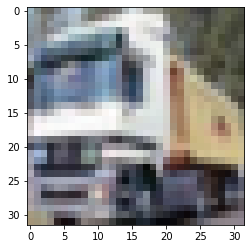

In [16]:
plt.imshow(train_images[1]);

In [17]:
train_labels[1][0]

9

    The CIFAR labels happen to be arrays, which is why you need the extra index

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [20]:
train_labels[1][0]

9

In [21]:
idx = train_labels[1][0]
class_names[idx]

'truck'

In [22]:
 def plot_train_img(img, size=1): 
    label = train_labels[img][0]
    plt.figure(figsize=(size,size))
    print("Label {} - {}".format(label, class_names[label]))
    plt.imshow(train_images[img])
    plt.grid(False)
    plt.axis('off')
    plt.show()

Label 2 - bird


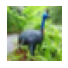

In [25]:
plot_train_img(6)

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Note that images are in color, not centered and with different backgrounds

## Preprocessing dataset

In [29]:
test_images.max()

255

In [30]:
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [31]:
test_images.max()

1.0

## Create Model Arquitecture and Compile

On Convolution layers, 
- strides is an integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Default (1,1).
- padding: one of "valid" or "same" (case-insensitive). Default = 'valid'.
  - "valid" means no padding.  
  - "same" results in padding with zeros evenly
to the left/right or up/down of the input such that output has the same


In [32]:
model = models.Sequential([
       layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
       layers.MaxPooling2D(2, 2),
       layers.Conv2D(64, (3,3), activation='relu'),
       layers.MaxPooling2D(2,2),
       layers.Flatten(),
       layers.Dense(64, activation='relu'),
       layers.Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                147520    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [33]:
LOSS = 'sparse_categorical_crossentropy'
OPTIMIZER = 'adam'

# Compile the model
model.compile(optimizer=OPTIMIZER,
              loss=LOSS,
              metrics=['accuracy'])

## Training

We can use the test dataset for validation during training, but the ideal is save it to be used after training to validate the final model. So, we will leave for TF to split a part of training data to use as epoch validation. 

In [35]:
NUM_EPOCHS = 20 #You can change this value if you like to experiment with it to get better accuracy

In [36]:
# Fit the model
history = model.fit(train_images, 
                    train_labels, 
                    epochs=NUM_EPOCHS, 
                    validation_split=0.1)
                  

Epoch 1/20
1407/1407 [==============================] - 36s 3ms/step - loss: 1.5289 - accuracy: 0.4482 - val_loss: 1.2653 - val_accuracy: 0.5504
Epoch 2/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.1780 - accuracy: 0.5875 - val_loss: 1.1063 - val_accuracy: 0.6118
Epoch 3/20
1407/1407 [==============================] - 4s 3ms/step - loss: 1.0402 - accuracy: 0.6376 - val_loss: 0.9980 - val_accuracy: 0.6598
Epoch 4/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.9583 - accuracy: 0.6653 - val_loss: 0.9676 - val_accuracy: 0.6650
Epoch 5/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.8975 - accuracy: 0.6890 - val_loss: 0.9062 - val_accuracy: 0.6942
Epoch 6/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.8379 - accuracy: 0.7080 - val_loss: 0.9557 - val_accuracy: 0.6746
Epoch 7/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.8013 - accuracy: 0.7234 - val_loss: 0.9108 - val_accuracy

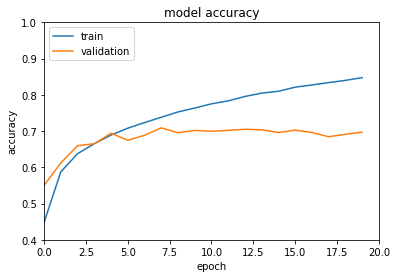

In [37]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()

## Evaluate Model

In [38]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.1352 - accuracy: 0.6815


[1.1352219581604004, 0.6815000176429749]

**Accuracy**
- Train: 85%; 
- Validation: 70% 
- Test: 68%

In [39]:
predictions = np.argmax(model.predict(test_images), axis=-1)
predictions.shape

(10000,)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72      1000
           1       0.76      0.83      0.79      1000
           2       0.65      0.52      0.58      1000
           3       0.55      0.41      0.47      1000
           4       0.61      0.63      0.62      1000
           5       0.60      0.58      0.59      1000
           6       0.66      0.85      0.74      1000
           7       0.71      0.75      0.73      1000
           8       0.79      0.76      0.78      1000
           9       0.75      0.74      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [42]:
confusion_matrix(test_labels,predictions)

array([[753,  18,  45,  13,  36,   9,  14,   9,  66,  37],
       [ 27, 826,   5,   7,  12,   7,  13,   5,  25,  73],
       [ 79,  10, 516,  56,  84,  69, 105,  52,   9,  20],
       [ 34,  15,  51, 414,  90, 166, 113,  63,  22,  32],
       [ 28,   9,  44,  48, 632,  56,  95,  68,  11,   9],
       [ 14,   9,  54, 138,  44, 583,  52,  85,  11,  10],
       [  3,   6,  31,  33,  39,  17, 846,  10,  10,   5],
       [ 25,   9,  20,  28,  65,  51,  17, 748,  11,  26],
       [ 87,  54,  17,  13,  14,   5,  13,   6, 760,  31],
       [ 32, 135,   7,   8,  13,  11,  11,  10,  36, 737]])

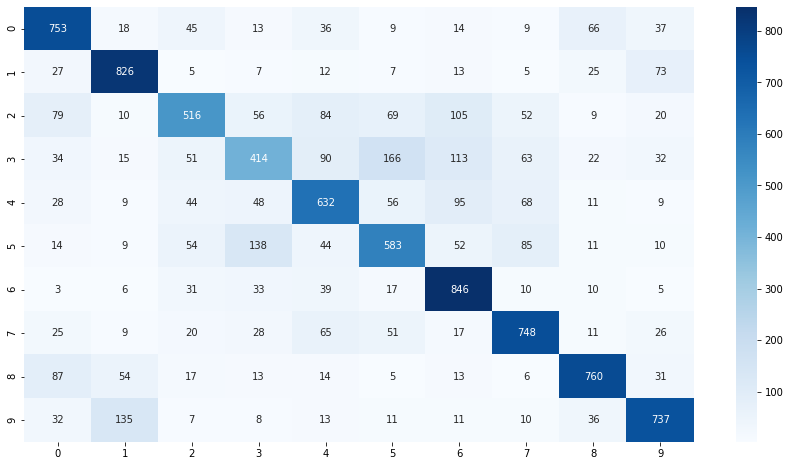

In [43]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(test_labels,predictions), cmap='Blues', annot=True, fmt='g');

In [44]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

## Testing Model (Predicting)

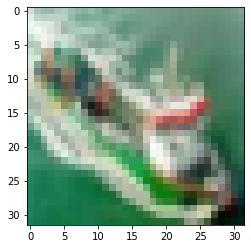

In [45]:
plt.imshow(test_images[15]);

In [46]:
test_labels[15][0]

8

In [47]:
class_names[8]

'ship'

In [48]:
test_images[15].shape

(32, 32, 3)

The input Tensor shape should be: (num_images, width, height, color_channels)

In [49]:
my_image = test_images[15]
my_image = my_image.reshape(1,32,32,3)
my_image.shape

(1, 32, 32, 3)

In [50]:
img_pred = np.argmax(model.predict(my_image))
class_names[img_pred]

'frog'

In [51]:
def img_pred(img, size=4):
    label = test_labels[img][0]
    my_image = test_images[img]
    plt.figure(figsize=(size,size))
    plt.imshow(my_image)
    my_image = my_image.reshape(1,32,32,3)
    img_pred = np.argmax(model.predict(my_image))
    pred_label = class_names[img_pred]
    print(" Label {} <=> Pred: {}".format(class_names[label], pred_label))
    plt.grid(False)
    plt.axis('off')
    plt.show()

 Label ship <=> Pred: frog


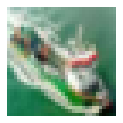

In [53]:
img_pred(15, 2)

 Label horse <=> Pred: horse


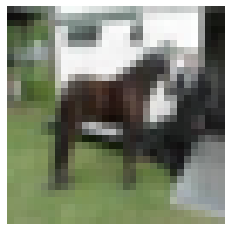

In [54]:
img_pred(20)

 Label cat <=> Pred: cat


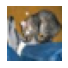

In [57]:
img_pred(0, 1)

 Label ship <=> Pred: automobile


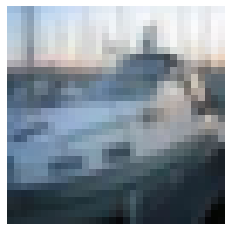

In [58]:
img_pred(2)

 Label airplane <=> Pred: ship


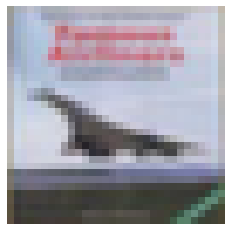

In [59]:
img_pred(3)

 Label frog <=> Pred: frog


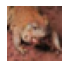

In [60]:
img_pred(5,1)

## Saving the model

In [61]:
!pwd # Linux command, shows where we are in CoLab's folders

/content


In [62]:
model.save('cifar_10_model.h5')

Use [Netron](https://netron.app) to visualize the model, hyperparameters, tensor shapes, etc. Netron is a viewer for neural network, deep learning and machine learning models (See [GitHub](https://github.com/lutzroeder/netron) for instructions about instalation in your desktop). 